## Assignment 2: Spam Classification with SVM

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia

![Spam email](https://www.saleshandy.com/blog/wp-content/uploads/2017/01/wsi-imageoptim-11-Reasons-Why-Your-Email-Ends-Up-In-Spam.png)

*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (20 pts)

**Data Acquiring:** Download the spam dataset from UC Irvine. You can find the dataset attached with the assignment in Collab. Note that the data is in raw file, so you have to convert them into a readable format (ie. CSV). Please be sure to read its documentation to learn more about the dataset. 

**Data Splitting:** Put data into the format needed for classification task, then split it into 80% training, 20% testing (each should have approximately the same proportion between positive and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your SVM model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard library StandardScaler to normalize the value of each features.

In [1]:
# You might want to use the following packages
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import numpy as np


# Your code goes here for this section.

SPAM_PATH = "spambase.csv"
SPAM_NAME_PATH = "spambaseCols.csv"

def load_spam_data(spam_path=SPAM_PATH):
    return pd.read_csv(SPAM_PATH)

def load_spam_NAME_data(spam_name_path=SPAM_NAME_PATH):
    return pd.read_csv(SPAM_NAME_PATH)

spam = load_spam_data()
spam_names = load_spam_NAME_data().values.tolist()

spam.isnull().values.any()  #this is false so there are no missing values

spam_names.insert(0, ["word_freq_make", "NaN"])
spam_names.append(["spam?", "NaN"])


In [2]:
nameDict = {}

for x in range(0, len(spam_names)):
    n = spam_names[x][0]
    k = spam.columns[x]
    nameDict[k] = n

In [3]:
from pandas.plotting import scatter_matrix

attributes = ["1"]

for element in spam.columns:   #only doing a few because trying plot all of them in a matrix CRASHES my server
    try:
        if float(element) > 1:
            attributes.append(element)
    except:
        i = 1
        
scatter_matrix(spam[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CEBF42A58>,
      dtype=object)

In [4]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [5]:
spam_num = spam
imputer.fit(spam_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [6]:
spam_num.isnull().values.any() 

False

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(spam_num, test_size=0.2, random_state=42)

train_set.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.104582,0.198207,0.285834,0.065514,0.310793,0.098315,0.107758,0.107704,0.089234,0.231674,...,0.038745,0.142139,0.016950,0.272394,0.076457,0.047606,5.017179,53.011957,279.874185,0.386413
std,0.300767,1.210873,0.516812,1.431973,0.681391,0.280328,0.385166,0.405882,0.259678,0.629594,...,0.246363,0.283041,0.115087,0.873680,0.260388,0.476038,28.844426,208.904475,574.633096,0.486993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.591500,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066500,0.000000,0.000000,0.000000,0.000000,2.256500,14.000000,93.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.150000,...,0.000000,0.192000,0.000000,0.310000,0.051000,0.000000,3.668250,43.000000,261.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,3.330000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1021.500000,9989.000000,10062.000000,1.000000


In [8]:
spam_temp = train_set.drop("1", axis=1)
spam_labels = train_set["1"].copy()

spam_test_temp = test_set.drop("1", axis=1)
spam_test_labels = test_set["1"].copy()

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

spam_prepared = (num_pipeline.fit_transform(spam_temp))
spam_test_prepared = (num_pipeline.fit_transform(spam_test_temp))

c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
X_train = spam_prepared;
y_train = spam_labels;
X_test = spam_test_prepared;
y_test = spam_test_labels;

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

spam_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, spam_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.32147275820877974

### AS WE CAN SEE ABOVE, linear regression on this dataset does not do too well, let us continue with SVM

- - -
## 2. TRAINING LINEAR SVM FOR SPAM CLASSIFICATION (15 pts)

Train your linear SVM classifier on the training data, and then test the classifier on the test data. You may use the default **loss function** (="hinge") and **default** value of the C hyperparameter (=1.0):

* Report (1) accuracy, (2) precision, (3) recall, and (4) F-score on the test data
* Create an ROC curve, using 100 evenly spaced thresholds, for this SVM. You may use library function calls to create the ROC curve.

**Implementation Notes:** For SVM, you do NOT need to add a column of 1's to the $\mathbf{x}$ matrix to have an intercept term



In [12]:
from sklearn.svm import LinearSVC

scaler = StandardScaler()

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)

scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

scaled_svm_clf.fit(X_train, y_train)

y_predictions = scaled_svm_clf.predict(X_train)


b1 = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf.coef_[0] / scaler.scale_
svm_clf.intercept_ = np.array([b1])
svm_clf.coef_ = np.array([w1])


t = y_train * 2 - 1
support_vectors_idx = (t * (X_train.dot(w1) + b1) < 1).ravel()
svm_clf.support_vectors_ = X_train[support_vectors_idx]

c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

[0, 4, 0, 1]

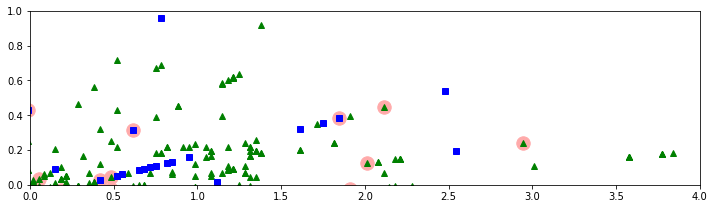

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3.2))
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "g^", label="Spam")
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "bs", label="Not Spam")
plot_svc_decision_boundary(svm_clf, 0, 4)
plt.axis([0, 4, 0, 1])

In [15]:
# Testing your svm here
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

old_A = accuracy_score(y_train, y_predictions)
old_P = precision_score(y_train, y_predictions)
old_R = recall_score(y_train, y_predictions)
old_F = f1_score(y_train, y_predictions)

print("1) Accuracy  : " + str(old_A))
print("2) Precision : " + str(old_P))
print("3) Recall    : " + str(old_R))
print("4) F1-score  : " + str(old_F))

1) Accuracy  : 0.9366847826086957
2) Precision : 0.9317356572258533
3) Recall    : 0.9022503516174403
4) F1-score  : 0.9167559842801001


In [16]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(scaled_svm_clf, X_train, y_train, cv=3,
                             method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


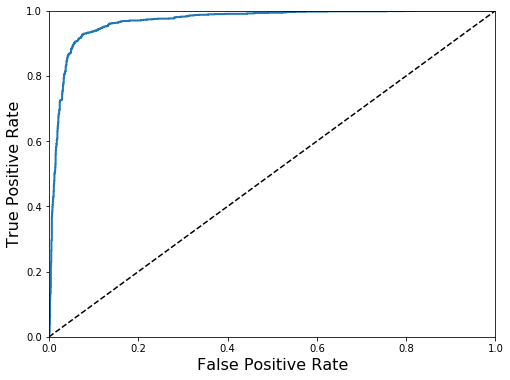

In [17]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

- - -
## 3. TUNING REGULARIZATION HYPER-PARAMETER C (15 pts)
Next, you will study the SVM tradeoff between margin and data violation by using different values of the C hyper-parameter. Your task is to run an experiment with different values of C on the spam dataset and report the performance measures similar to section 2. After running the experiment, you must provide some justifications on the reason you select a certain value of C. 

Hint: you can use cross validation for each value of C and then pick the value which yields the best performance.

In [18]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

def testBestC(c):
    scaler = StandardScaler()

    # Training your svm here
    svm_clf = LinearSVC(C=c, loss="hinge", random_state=42)

    scaled_svm_clf = Pipeline([
            ("scaler", scaler),
            ("linear_svc", svm_clf),
        ])

    scaled_svm_clf.fit(X_train, y_train)

    y_predictions = scaled_svm_clf.predict(X_train)

    #return cross_val_score(scaled_svm_clf, X_train, y_train, cv=2, scoring="precision")
    return f1_score(y_train, y_predictions)

bestC = 0
bestAcc = 0
cList = []
fscoreList = []
for x in range(1, 100):
    temp = testBestC(x)
    cList.append(x)
    fscoreList.append(temp)
#     mean = 0
#     for el in tempList:
#         mean = mean + el
#     temp = mean/len(tempList)    
    if bestAcc < temp:
        bestC = x
        bestAcc = temp
        
print(bestC)
print(bestAcc)

26
0.9229676961306355


Text(0.5, 1.0, 'C value vs. F1-Score')

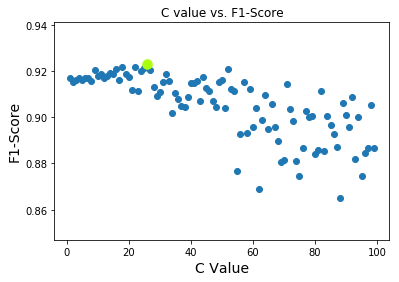

In [19]:
import matplotlib.pyplot as plt
plt.scatter(cList, fscoreList)
plt.scatter(bestC, bestAcc, s=90, facecolors='#AAFF11')
plt.xlabel("C Value", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)
plt.title("C value vs. F1-Score")

### 26 was the best C value in a range of 100, let us test it and see the recall, precision, etc.

In [20]:
from sklearn.svm import LinearSVC

scaler = StandardScaler()

# Training your svm here
svm_clf = LinearSVC(C=bestC, loss="hinge", random_state=42)

scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

scaled_svm_clf.fit(X_train, y_train)

y_predictions_new = scaled_svm_clf.predict(X_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print("1) Accuracy  : " + str(accuracy_score(y_train, y_predictions_new)) + "     Old: " + str(old_A))
print("2) Precision : " + str(precision_score(y_train, y_predictions_new)) + "     Old: " + str(old_P))
print("3) Recall    : " + str(recall_score(y_train, y_predictions_new)) + "     Old: " + str(old_R))
print("4) F1-score  : " + str(f1_score(y_train, y_predictions_new)) + "     Old: " + str(old_F))

1) Accuracy  : 0.9410326086956522     Old: 0.9366847826086957
2) Precision : 0.931899641577061     Old: 0.9317356572258533
3) Recall    : 0.9142053445850914     Old: 0.9022503516174403
4) F1-score  : 0.9229676961306355     Old: 0.9167559842801001


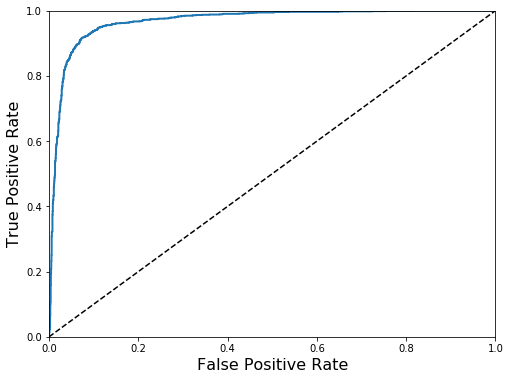

In [21]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(scaled_svm_clf, X_train, y_train, cv=3,
                             method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

- - -
## 4. SELECTING THE FEATURES WITH LINEAR SVM (20 pts)

Once your learned a best linear SVM in previous sections, your next task is to find which are best features to classify spam. First, you must obtain the weight vector $\mathbf{w}$ using the attribute $coef_$ of your SVM classifier. Then, for the number of features $n = 2$ to $57$, you will run the following in a loop:

* Select a set of top $n$ features that have the highest weights
* Train a classifier $\text{SVM}_n$ on all training data, only using these $n$ features with the same hyperparameter C learn from section 3.
* Test $\text{SVM}_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

Identify the top 5 features. Using the plot, discuss the effects of feature selection on the performance in a short paragraph (ie. How much better the performance becomes everytime one of top 5 features is added? Were the top spam features surprising to you?)  



In [22]:
# Your feature selection code goes here
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import operator

bestC = 26

# Training your svm here
svm_clf = LinearSVC(C=bestC, loss="hinge", random_state=42)

svm_clf.fit(X_train, y_train)

#WEIGHT VECTOR
w = svm_clf.coef_[0]

#INTERCEPT
b = svm_clf.intercept_[0]

In [23]:
#Select a set of top  𝑛  features that have the highest weights
def f_importances(coef, names, n):
    imp = map(abs, coef)
    imp, names = zip(*sorted(zip(imp,names), reverse=True))
    sorted_coef = list(imp)
    sorted_names = list(names)
    temp = names[0:n]
    return list(temp)

bestC = 26
accuracyList = []
nList = []
top5 = []
top5Acc = []

for n in range(2, 58):
    nImpF = f_importances(w, spam.columns, n)
    
    X_train_temp = train_set[nImpF].copy()
    X_test_temp = test_set[nImpF].copy()
    
    
    #Train a classifier  SVM𝑛  on all training data
    #only using these  𝑛  features with the same hyperparameter C learn from section 3.
    svm_clf = LinearSVC(C=bestC, loss="hinge", random_state=42)
    svm_clf.fit(X_train_temp, y_train)
    
    
    #Test  SVM𝑛  on the test set (using the same  𝑛  features) to obtain accuracy.
    y_test_predictions = svm_clf.predict(X_test_temp)
    
    if  n == 5:
        top5 = nImpF
        
        
    acc = accuracy_score(y_test, y_test_predictions)
    accuracyList.append(acc)
    nList.append(n)
    
    if n <= 5:
        top5Acc.append(acc)

[0, 57, 0, 1]

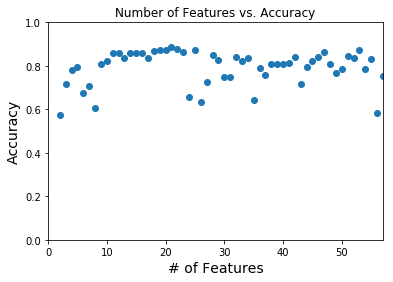

In [24]:
#Plot accuracy on test data vs.  𝑛  number of features
import matplotlib.pyplot as plt
plt.scatter(nList, accuracyList)
plt.xlabel("# of Features", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Number of Features vs. Accuracy")
plt.axis([0, 57, 0, 1])

In [25]:
max(accuracyList)

0.8847826086956522

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C8088C048>,
      dtype=object)

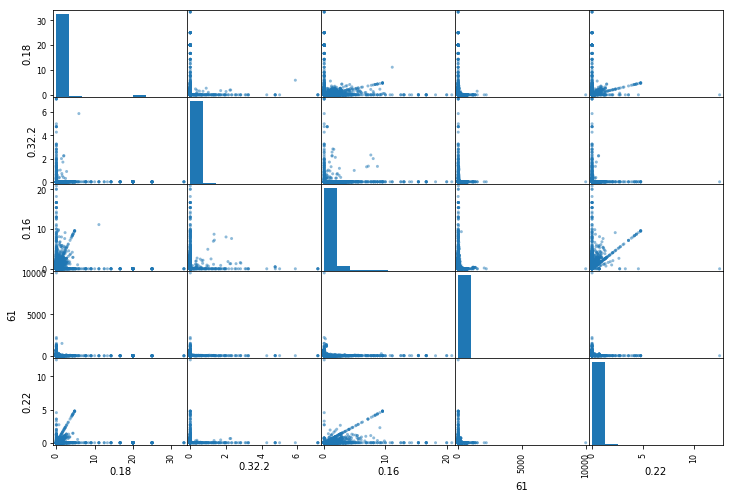

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(spam[top5], figsize=(12, 8))

In [27]:
print("The top 5 most important features are: ")
for item in top5:
    print(nameDict[item])

The top 5 most important features are: 
word_freq_george
word_freq_cs
word_freq_hp
capital_run_length_longest
word_freq_telnet


In [28]:
for i in range(0, len(top5Acc)):
    print("Top " + str(i+2) + " Attributes result in " + str(top5Acc[i]) + " accuracy")

Top 2 Attributes result in 0.5760869565217391 accuracy
Top 3 Attributes result in 0.7152173913043478 accuracy
Top 4 Attributes result in 0.7804347826086957 accuracy
Top 5 Attributes result in 0.7945652173913044 accuracy


In [29]:
# Your paragraph goes here for this section
#discuss the effects of feature selection on the performance in a short paragraph
#(ie. How much better the performance becomes everytime one of top 5 features is added? 
#Were the top spam features surprising to you?)

"""
As shown above, the top five features of most importance are word_freq_george, word_freq_cs, 
word_freq_hp, capital_run_length_longest, word_freq_telnet.

This is not surprising, as with spam emails, you often see telnet and all caps aimed at capturing the
attention of those who fall of these schemes. Furthermore, our safeword 'george' was caught as well,
which identified non-spam emails as specified in the Documentation for the datasets.

Also as shown in the above block, the accuracy increased in large steps everytime one of the top 5 features
were added. It went from 0.58 accuracy with 2 features to a staggering 0.72 with 3 featurs. It finished
at 0.79 accuracy with the top 5, which is a good delta of 0.21 over the addition 3 extra important features.

These features do not surprise me. As we saw above, the filtered word 'george' had the largest weight,
confirming that our filter system is function and not labelling 'george' emails as spam. As for the other
attributes, although not surprising, they were interesting. I was interested to see 'telnet', 'hp', 'cs'
appear in the mix as well making the classfication stronger, although not as much as the first few. 
The longest all caps was the most obvious, as it is a known characteristic of spam emails.
"""

"\nAs shown above, the top five features of most importance are word_freq_george, word_freq_cs, \nword_freq_hp, capital_run_length_longest, word_freq_telnet.\n\nThis is not surprising, as with spam emails, you often see telnet and all caps aimed at capturing the\nattention of those who fall of these schemes. Furthermore, our safeword 'george' was caught as well,\nwhich identified non-spam emails as specified in the Documentation for the datasets.\n\nAlso as shown in the above block, the accuracy increased in large steps everytime one of the top 5 features\nwere added. It went from 0.58 accuracy with 2 features to a staggering 0.72 with 3 featurs. It finished\nat 0.79 accuracy with the top 5, which is a good delta of 0.21 over the addition 3 extra important features.\n\nThese features do not surprise me. As we saw above, the filtered word 'george' had the largest weight,\nconfirming that our filter system is function and not labelling 'george' emails as spam. As for the other\nattribute

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on this dataset which is not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

First, your task is to determine the best regularization $C$ and the spread of the Gaussian kernel $\gamma$ hyperparameters to use. You can train the SVM on the training set and report the performance in metrics from section 2. By using different values of $C$ and $\gamma$, you will be able to learn a good non-linear decision boundary that can perform reasonably well for this dataset. 

Next, you will compare the performance of this kernelized version of SVM and the of linear SVM in Section 3. You will need to plot out the performance in terms of accuracy, precision, and recall, and the ROC curve) for both. How much better does your non-linear SVM classifier perform comparing to a linear SVM? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error using cross validation.

Finally, write a paragraph reporting on the final performance of your RBF kerneled SVM. Do you think the performance is adequate to be deployed in practice? Justify your reasons.




In [30]:
from sklearn.svm import SVC
# gamma1, gamma2 = 0.1, 5
# C1, C2 = 0.001, 1000
# hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

# svm_clfs = []
# for gamma, C in hyperparams:
#     rbf_kernel_svm_clf = Pipeline([
#             ("scaler", StandardScaler()),
#             ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
#         ])
#     rbf_kernel_svm_clf.fit(X_train, y_train)
#     svm_clfs.append(rbf_kernel_svm_clf)

gauss_svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
gauss_svm_clf.fit(X_train, y_train)

gauss_y_pred = gauss_svm_clf.predict(X_train)
accuracy_score(y_train, gauss_y_pred)

0.9491847826086957

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1,10)}
gauss_rs_cv = RandomizedSearchCV(gauss_svm_clf, params, n_iter=50, verbose=2)
gauss_rs_cv.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=9.122346422463167, gamma=0.05354820628440092 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=9.122346422463167, gamma=0.05354820628440092, total=   0.3s
[CV] C=9.122346422463167, gamma=0.05354820628440092 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ... C=9.122346422463167, gamma=0.05354820628440092, total=   0.2s
[CV] C=9.122346422463167, gamma=0.05354820628440092 ..................
[CV] ... C=9.122346422463167, gamma=0.05354820628440092, total=   0.2s
[CV] C=8.485373057313437, gamma=0.010298703466325039 .................
[CV] .. C=8.485373057313437, gamma=0.010298703466325039, total=   0.1s
[CV] C=8.485373057313437, gamma=0.010298703466325039 .................
[CV] .. C=8.485373057313437, gamma=0.010298703466325039, total=   0.1s
[CV] C=8.485373057313437, gamma=0.010298703466325039 .................
[CV] .. C=8.485373057313437, gamma=0.010298703466325039, total=   0.1s
[CV] C=2.651223453216871, gamma=0.0856938633328504 ...................
[CV] .... C=2.651223453216871, gamma=0.0856938633328504, total=   0.3s
[CV] C=2.651223453216871, gamma=0.0856938633328504 ...................
[CV] .... C=2.651223453216871, gamma=0.0856938633328504, total=   0.3s
[CV] C=2.651223453216871, gamma=0.0856938633328504 ...................
[CV] .

[CV] .. C=1.8715343338809078, gamma=0.02925899999008169, total=   0.2s
[CV] C=8.649222413465626, gamma=0.0037734683829771533 ................
[CV] . C=8.649222413465626, gamma=0.0037734683829771533, total=   0.1s
[CV] C=8.649222413465626, gamma=0.0037734683829771533 ................
[CV] . C=8.649222413465626, gamma=0.0037734683829771533, total=   0.1s
[CV] C=8.649222413465626, gamma=0.0037734683829771533 ................
[CV] . C=8.649222413465626, gamma=0.0037734683829771533, total=   0.1s
[CV] C=5.259494980830628, gamma=0.034340644700592914 .................
[CV] .. C=5.259494980830628, gamma=0.034340644700592914, total=   0.2s
[CV] C=5.259494980830628, gamma=0.034340644700592914 .................
[CV] .. C=5.259494980830628, gamma=0.034340644700592914, total=   0.2s
[CV] C=5.259494980830628, gamma=0.034340644700592914 .................
[CV] .. C=5.259494980830628, gamma=0.034340644700592914, total=   0.2s
[CV] C=1.9978330010003544, gamma=0.0025226805772921306 ...............
[CV]  

[CV]  C=1.8125562481994741, gamma=0.0012424080468174212, total=   0.2s
[CV] C=1.8125562481994741, gamma=0.0012424080468174212 ...............
[CV]  C=1.8125562481994741, gamma=0.0012424080468174212, total=   0.2s
[CV] C=1.8125562481994741, gamma=0.0012424080468174212 ...............
[CV]  C=1.8125562481994741, gamma=0.0012424080468174212, total=   0.2s
[CV] C=10.630343351295826, gamma=0.001296367973594388 ................
[CV] . C=10.630343351295826, gamma=0.001296367973594388, total=   0.1s
[CV] C=10.630343351295826, gamma=0.001296367973594388 ................
[CV] . C=10.630343351295826, gamma=0.001296367973594388, total=   0.1s
[CV] C=10.630343351295826, gamma=0.001296367973594388 ................
[CV] . C=10.630343351295826, gamma=0.001296367973594388, total=   0.1s
[CV] C=7.873469325059297, gamma=0.015898711387193183 .................
[CV] .. C=7.873469325059297, gamma=0.015898711387193183, total=   0.1s
[CV] C=7.873469325059297, gamma=0.015898711387193183 .................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   56.8s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029C843469E8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029C8083B6A0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [32]:
gauss_rs_cv.best_estimator_.fit(X_train, y_train)

SVC(C=8.485373057313437, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.010298703466325039,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
gauss_pred_y = gauss_rs_cv.best_estimator_.predict(X_test)

from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=bestC, loss="hinge", random_state=42)

scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

scaled_svm_clf.fit(X_train, y_train)

linear_pred_y = scaled_svm_clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print("1) Linear Accuracy  : " + str(accuracy_score(y_test, linear_pred_y)) + "  Gauss Accuracy   : " + str(accuracy_score(y_test, gauss_pred_y)))
print("2) Linear Precision : " + str(precision_score(y_test, linear_pred_y)) + "  Gauss Precision  : " + str(precision_score(y_test, gauss_pred_y)))
print("3) Linear Recall    : " + str(recall_score(y_test, linear_pred_y)) + "  Gauss Recall     : " + str(recall_score(y_test, gauss_pred_y)))
print("4) Linear F1-score  : " + str(f1_score(y_test, linear_pred_y)) + "  Gauss F1-score   : " + str(f1_score(y_test, gauss_pred_y)))

1) Linear Accuracy  : 0.9010869565217391  Gauss Accuracy   : 0.9217391304347826
2) Linear Precision : 0.9283667621776505  Gauss Precision  : 0.9517045454545454
3) Linear Recall    : 0.8307692307692308  Gauss Recall     : 0.8589743589743589
4) Linear F1-score  : 0.8768606224627876  Gauss F1-score   : 0.9029649595687331


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=3.2168682617809585, gamma=0.00696972133275984 .................
[CV] .. C=3.2168682617809585, gamma=0.00696972133275984, total=   0.0s
[CV] C=3.2168682617809585, gamma=0.00696972133275984 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=3.2168682617809585, gamma=0.00696972133275984, total=   0.0s
[CV] C=3.2168682617809585, gamma=0.00696972133275984 .................
[CV] .. C=3.2168682617809585, gamma=0.00696972133275984, total=   0.0s
[CV] C=5.532621541621854, gamma=0.021497815196515984 .................
[CV] .. C=5.532621541621854, gamma=0.021497815196515984, total=   0.0s
[CV] C=5.532621541621854, gamma=0.021497815196515984 .................
[CV] .. C=5.532621541621854, gamma=0.021497815196515984, total=   0.0s
[CV] C=5.532621541621854, gamma=0.021497815196515984 .................
[CV] .. C=5.532621541621854, gamma=0.021497815196515984, total=   0.0s
[CV] C=3.2593313886480546, gamma=0.004821874397419402 ................
[CV] . C=3.2593313886480546, gamma=0.004821874397419402, total=   0.0s
[CV] C=3.2593313886480546, gamma=0.004821874397419402 ................
[CV] . C=3.2593313886480546, gamma=0.004821874397419402, total=   0.0s
[CV] C=3.2593313886480546, gamma=0.004821874397419402 ................
[CV] .

[CV] . C=3.544758448970023, gamma=0.0014605460660809377, total=   0.0s
[CV] C=9.860628542677466, gamma=0.0038886709442290932 ................
[CV] . C=9.860628542677466, gamma=0.0038886709442290932, total=   0.0s
[CV] C=9.860628542677466, gamma=0.0038886709442290932 ................
[CV] . C=9.860628542677466, gamma=0.0038886709442290932, total=   0.0s
[CV] C=9.860628542677466, gamma=0.0038886709442290932 ................
[CV] . C=9.860628542677466, gamma=0.0038886709442290932, total=   0.0s
[CV] C=1.1121607774020439, gamma=0.001879120155092735 ................
[CV] . C=1.1121607774020439, gamma=0.001879120155092735, total=   0.0s
[CV] C=1.1121607774020439, gamma=0.001879120155092735 ................
[CV] . C=1.1121607774020439, gamma=0.001879120155092735, total=   0.0s
[CV] C=1.1121607774020439, gamma=0.001879120155092735 ................
[CV] . C=1.1121607774020439, gamma=0.001879120155092735, total=   0.0s
[CV] C=9.222857231494851, gamma=0.0022017383237581717 ................
[CV] .

[CV] .. C=10.114878968800951, gamma=0.04591965040599072, total=   0.1s
[CV] C=10.114878968800951, gamma=0.04591965040599072 .................
[CV] .. C=10.114878968800951, gamma=0.04591965040599072, total=   0.0s
[CV] C=10.114878968800951, gamma=0.04591965040599072 .................
[CV] .. C=10.114878968800951, gamma=0.04591965040599072, total=   0.0s
[CV] C=2.3381001880524934, gamma=0.0017431811859726601 ...............
[CV]  C=2.3381001880524934, gamma=0.0017431811859726601, total=   0.0s
[CV] C=2.3381001880524934, gamma=0.0017431811859726601 ...............
[CV]  C=2.3381001880524934, gamma=0.0017431811859726601, total=   0.0s
[CV] C=2.3381001880524934, gamma=0.0017431811859726601 ...............
[CV]  C=2.3381001880524934, gamma=0.0017431811859726601, total=   0.0s
[CV] C=1.2092614409110383, gamma=0.0021433703452661515 ...............
[CV]  C=1.2092614409110383, gamma=0.0021433703452661515, total=   0.0s
[CV] C=1.2092614409110383, gamma=0.0021433703452661515 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   24.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] C=1.5353071600438264, gamma=0.0016261295803683023 ...............
[CV]  C=1.5353071600438264, gamma=0.0016261295803683023, total=   0.0s
[CV] C=1.5353071600438264, gamma=0.0016261295803683023 ...............
[CV]  C=1.5353071600438264, gamma=0.0016261295803683023, total=   0.0s
[CV] C=1.5353071600438264, gamma=0.0016261295803683023 ...............
[CV]  C=1.5353071600438264, gamma=0.0016261295803683023, total=   0.0s
[CV] C=3.1290131016555005, gamma=0.004811399784616727 ................
[CV] . C=3.1290131016555005, gamma=0.004811399784616727, total=   0.0s
[CV] C=3.1290131016555005, gamma=0.004811399784616727 ................
[CV] . C=3.1290131016555005, gamma=0.004811399784616727, total=   0.0s
[CV] C=3.1290131016555005, gamma=0.004811399784616727 ................
[CV] . C=3.1290131016555005, gamma=0.004811399784616727, total=   0.0s
[CV] C=8.486307012828792, gamma=0.016875287293142763 .................
[CV] .. C=8.486307012828792, gamma=0.016875287293142763, total=   0.0s
[CV] C

[CV] ... C=7.208306926516718, gamma=0.03884387353554685, total=   0.0s
[CV] C=7.208306926516718, gamma=0.03884387353554685 ..................
[CV] ... C=7.208306926516718, gamma=0.03884387353554685, total=   0.1s
[CV] C=4.682681145417872, gamma=0.028097359739951193 .................
[CV] .. C=4.682681145417872, gamma=0.028097359739951193, total=   0.0s
[CV] C=4.682681145417872, gamma=0.028097359739951193 .................
[CV] .. C=4.682681145417872, gamma=0.028097359739951193, total=   0.0s
[CV] C=4.682681145417872, gamma=0.028097359739951193 .................
[CV] .. C=4.682681145417872, gamma=0.028097359739951193, total=   0.0s
[CV] C=2.987950967921405, gamma=0.01501635395964086 ..................
[CV] ... C=2.987950967921405, gamma=0.01501635395964086, total=   0.0s
[CV] C=2.987950967921405, gamma=0.01501635395964086 ..................
[CV] ... C=2.987950967921405, gamma=0.01501635395964086, total=   0.0s
[CV] C=2.987950967921405, gamma=0.01501635395964086 ..................
[CV] .

[CV] ... C=5.610515937720852, gamma=0.08119204586513058, total=   0.1s
[CV] C=2.715035728386829, gamma=0.09926536332308036 ..................
[CV] ... C=2.715035728386829, gamma=0.09926536332308036, total=   0.2s
[CV] C=2.715035728386829, gamma=0.09926536332308036 ..................
[CV] ... C=2.715035728386829, gamma=0.09926536332308036, total=   0.2s
[CV] C=2.715035728386829, gamma=0.09926536332308036 ..................
[CV] ... C=2.715035728386829, gamma=0.09926536332308036, total=   0.1s
[CV] C=9.377612372754653, gamma=0.0220284871687671 ...................
[CV] .... C=9.377612372754653, gamma=0.0220284871687671, total=   0.0s
[CV] C=9.377612372754653, gamma=0.0220284871687671 ...................
[CV] .... C=9.377612372754653, gamma=0.0220284871687671, total=   0.0s
[CV] C=9.377612372754653, gamma=0.0220284871687671 ...................
[CV] .... C=9.377612372754653, gamma=0.0220284871687671, total=   0.0s
[CV] C=10.31402619842739, gamma=0.045383550044237705 .................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   28.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] C=5.33174155764357, gamma=0.0024694469659561373 .................
[CV] .. C=5.33174155764357, gamma=0.0024694469659561373, total=   0.0s
[CV] C=5.33174155764357, gamma=0.0024694469659561373 .................
[CV] .. C=5.33174155764357, gamma=0.0024694469659561373, total=   0.0s
[CV] C=5.33174155764357, gamma=0.0024694469659561373 .................
[CV] .. C=5.33174155764357, gamma=0.0024694469659561373, total=   0.0s
[CV] C=9.861624378975831, gamma=0.04793635818979672 ..................
[CV] ... C=9.861624378975831, gamma=0.04793635818979672, total=   0.1s
[CV] C=9.861624378975831, gamma=0.04793635818979672 ..................
[CV] ... C=9.861624378975831, gamma=0.04793635818979672, total=   0.1s
[CV] C=9.861624378975831, gamma=0.04793635818979672 ..................
[CV] ... C=9.861624378975831, gamma=0.04793635818979672, total=   0.0s
[CV] C=9.560404267240996, gamma=0.01851491003712973 ..................
[CV] ... C=9.560404267240996, gamma=0.01851491003712973, total=   0.0s
[CV] C

[CV] . C=6.679197213582084, gamma=0.0012618301735754615, total=   0.0s
[CV] C=6.679197213582084, gamma=0.0012618301735754615 ................
[CV] . C=6.679197213582084, gamma=0.0012618301735754615, total=   0.0s
[CV] C=6.550727525212517, gamma=0.0012185255699219415 ................
[CV] . C=6.550727525212517, gamma=0.0012185255699219415, total=   0.0s
[CV] C=6.550727525212517, gamma=0.0012185255699219415 ................
[CV] . C=6.550727525212517, gamma=0.0012185255699219415, total=   0.0s
[CV] C=6.550727525212517, gamma=0.0012185255699219415 ................
[CV] . C=6.550727525212517, gamma=0.0012185255699219415, total=   0.0s
[CV] C=2.0304062129518545, gamma=0.04691998735878802 .................
[CV] .. C=2.0304062129518545, gamma=0.04691998735878802, total=   0.0s
[CV] C=2.0304062129518545, gamma=0.04691998735878802 .................
[CV] .. C=2.0304062129518545, gamma=0.04691998735878802, total=   0.0s
[CV] C=2.0304062129518545, gamma=0.04691998735878802 .................
[CV] .

[CV] . C=8.780246171414422, gamma=0.0010482944165733075, total=   0.0s
[CV] C=8.780246171414422, gamma=0.0010482944165733075 ................
[CV] . C=8.780246171414422, gamma=0.0010482944165733075, total=   0.0s
[CV] C=8.780246171414422, gamma=0.0010482944165733075 ................
[CV] . C=8.780246171414422, gamma=0.0010482944165733075, total=   0.0s
[CV] C=2.542879047600334, gamma=0.03379036463373507 ..................
[CV] ... C=2.542879047600334, gamma=0.03379036463373507, total=   0.0s
[CV] C=2.542879047600334, gamma=0.03379036463373507 ..................
[CV] ... C=2.542879047600334, gamma=0.03379036463373507, total=   0.0s
[CV] C=2.542879047600334, gamma=0.03379036463373507 ..................
[CV] ... C=2.542879047600334, gamma=0.03379036463373507, total=   0.0s
[CV] C=4.961514170853148, gamma=0.0648286677099081 ...................
[CV] .... C=4.961514170853148, gamma=0.0648286677099081, total=   0.1s
[CV] C=4.961514170853148, gamma=0.0648286677099081 ...................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   27.2s finished


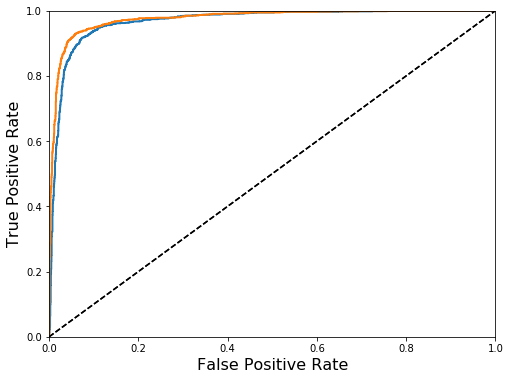

In [34]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(scaled_svm_clf, X_train, y_train, cv=3,
                             method="decision_function")

y_scores_gauss = cross_val_predict(gauss_rs_cv, X_train, y_train, cv=3,
                                  method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

Gfpr, Gtpr, Gthresholds = roc_curve(y_train, y_scores_gauss)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(Gfpr, Gtpr)
plt.show()

In [36]:
"""
Final performance of your RBF kerneled SVM. 
Do you think the performance is adequate to be deployed in practice? Justify your reasons.

The RBF kerneled SVM performed much better in every aspect than the linear one, I do think it is the way to go
if you want to get the best performace. The ROC curve also confirms this, as the curve edges closer to the ideal 0 false
positive and 1 true positive corner

I do not think this current model is ready for deployment just yet as recall is still not near 1. This means that
a lot of important emails may get misclassified into spam, which is bad. We do not want our customers to miss out on
a time sensetive assignment due to our spam filtering. So with more training on the Gaussian model, we could eventually
get to a deployable state
"""

'\nFinal performance of your RBF kerneled SVM. \nDo you think the performance is adequate to be deployed in practice? Justify your reasons.\n\nThe RBF kerneled SVM performed much better in every aspect than the linear one, I do think it is the way to go\nif you want to get the best performace. The ROC curve also confirms this, as the curve edges closer to the ideal 0 false\npositive and 1 true positive corner\n\nI do not think this current model is ready for deployment just yet as recall is still not near 1. This means that\na lot of important emails may get misclassified into spam, which is bad. We do not want our customers to miss out on\na time sensetive assignment due to our spam filtering. So with more training on the Gaussian model, we could eventually\nget to a deployable state\n'

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 2:...".

Best of luck and have fun!